In [23]:
# importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import mpl, plt

In [36]:
# versões das bibliotecas

print(f'Versão Pandas :', pd.__version__)
print(f'Versão Numpy :', np.__version__)
print(f'Versão Matplotlib :', matplotlib.__version__)
print(f'Versão Seaborn :', sns.__version__)

Versão Pandas : 1.2.4
Versão Numpy : 1.19.5
Versão Matplotlib : 3.5.1
Versão Seaborn : 0.11.1


In [37]:
# leitura de dados direto do github

netflix_df = pd.read_csv('https://raw.githubusercontent.com/caiquemiranda/EDA-Exploratory-Data-Analysis/main/data/netflix_data.csv')

In [38]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [39]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [40]:
# criação de novo dicionario

years = [*range(2011, 2021)]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# criação de um diconario com duas listas

movie_dict = {'Years': years, 'Durations': durations}


# print o dicionario
movie_dict

{'Years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'Durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [41]:
# criação de um dataframe a partir do dicionario

durations_df = pd.DataFrame(movie_dict)

# print o dataframe

durations_df

,Years,Durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


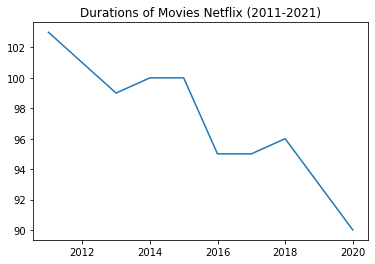

In [42]:
fig = plt.figure()
ax = plt.axes()
ax.plot(durations_df['Years'] , durations_df['Durations'])

# titulo
ax.set_title('Durations of Movies Netflix (2011-2021)')

# mostra o gráfico
plt.show()

In [43]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [44]:
# subset do dataframe apenas com filmes
netflix_df_movie = netflix_df[netflix_df['type'] == 'Movie']

# subset do dataframe com colunas de interesse para análise
netflix_df_col_subset = netflix_df_movie[['title', 'duration', 'country', 'genre', 'release_year']]

# print primeiros registros do dataframe
netflix_df_col_subset.head()

,title,duration,country,genre,release_year
1,7:19,93,Mexico,Dramas,2016
2,23:59,78,Singapore,Horror Movies,2011
3,9,80,United States,Action,2009
4,21,123,United States,Dramas,2008
6,122,95,Egypt,Horror Movies,2019


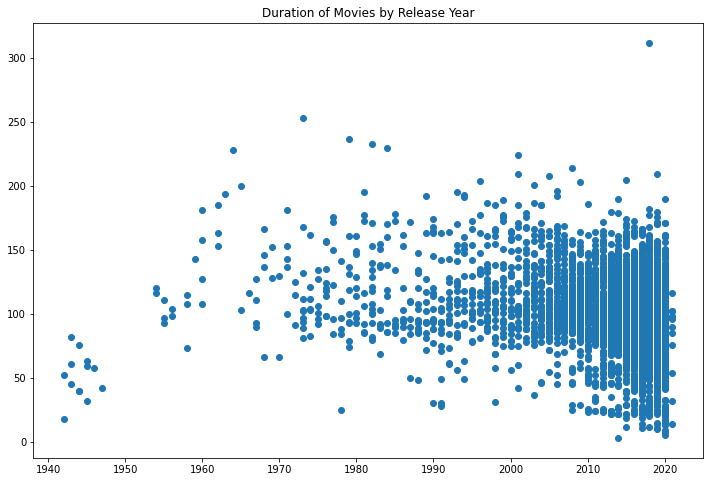

In [45]:
# criação de uma figura 
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

# criação de um gráfico de dispersão de duração versus ano de lançamento
ax.scatter(netflix_df_col_subset['release_year'], netflix_df_col_subset['duration'])

# criação do titulo do gráfico
ax.set_title('Duration of Movies by Release Year')

# mostrar o gráfico
plt.show()

In [49]:
# filtro de duração menor que 60min

short_movies = netflix_df_col_subset[netflix_df_col_subset['duration'] < 60]

short_movies.head(20)

,title,duration,country,genre,release_year
35,#Rucker50,56,United States,Documentaries,2016
55,100 Things to do Before High School,44,United States,Uncategorized,2014
67,13TH: A Conversation with Oprah Winfrey & Ava ...,37,NaN,Uncategorized,2017
101,3 Seconds Divorce,53,Canada,Documentaries,2018
146,A 3 Minute Hug,28,Mexico,Documentaries,2019
162,A Christmas Special: Miraculous: Tales of Lady...,22,France,Uncategorized,2016
171,A Family Reunion Christmas,29,United States,Uncategorized,2019
177,A Go! Go! Cory Carson Christmas,22,United States,Children,2020
178,A Go! Go! Cory Carson Halloween,22,NaN,Children,2020
179,A Go! Go! Cory Carson Summer Camp,21,NaN,Children,2020


In [52]:
# definindo uma lista de cores
colors = []

# iterando sobre o dataframe para definir as cores

for e in netflix_df_col_subset['genre']:
    if e == 'Children':
        colors.append('red')
    elif e == 'Documentaries':
        colors.append('blue')
    elif e == 'Stand-Up':
        colors.append('green')
    else:
        colors.append('black')


# inspesão dos dados colors
colors[:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

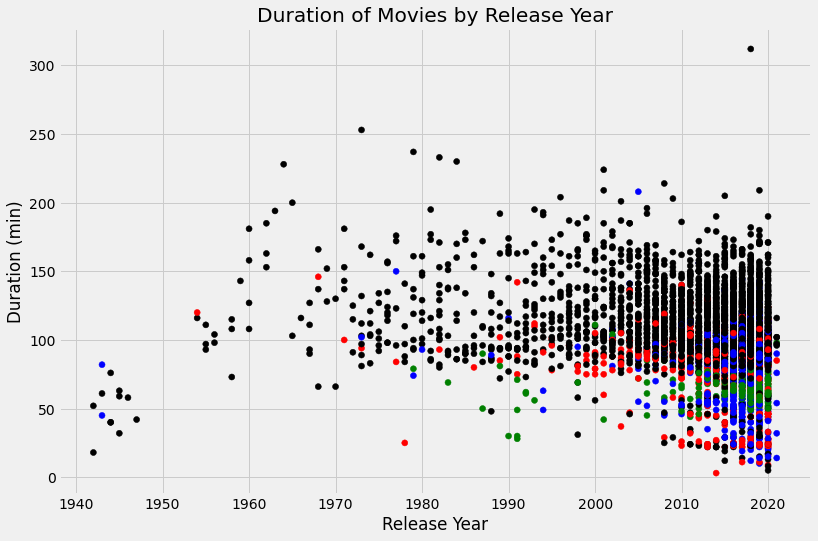

In [53]:
# 
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

# criaçao de um gráfico de dispersão de duração versus ano de lançamento
ax.scatter(netflix_df_col_subset['release_year'], netflix_df_col_subset['duration'], color=colors)

# criação do titulo do gráfico
ax.set_title('Duration of Movies by Release Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Duration (min)')

# mostrar o gráfico
plt.show()

In [54]:
# analise exploratória em andamento